<a href="https://colab.research.google.com/github/nvonbulow/csse490-nlp/blob/master/labs/Lab8AudioProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with audio Proocessing

In [1]:
# install library sabrosa
!pip install librosa

In [2]:
# insstall pydub
!pip install pydub

In [3]:
import librosa
import pydub
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import librosa.display


## Conversion
Convert mp3 to WAV

In [4]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3("/content/welcome.mp3")
sound.export("/content/welcome.wav", format="wav")

<_io.BufferedRandom name='/content/welcome.wav'>

The sampling rate is nothing but samples taken per second, and by default, librosa samples the file at a sampling rate of 22050; you can override it by your desired sampling rate. Take the product of sampling rate and length of the file you will get the total number of samples

In [5]:
# Load the audio file
AUDIO_FILE = '/content/welcome.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
# Here, ‘samples’ corresponds to number of samples captured in the audio and 
#‘sample_rate’ corresponds to the sampling rate (which is number of amplitudes sampled per second)

In [6]:
print('Total number of samples: ',samples.shape[0])
print('Sample rate: ',sample_rate)
# duration of audio = no of samples/sampling rate 
print('Length of file in seconds: ',librosa.get_duration(samples))


Total number of samples:  54144
Sample rate:  24000
Length of file in seconds:  2.455510204081633


audio data is obtained by sampling the sound wave at regular time intervals and measuring the intensity or amplitude of the wave at each sample.

## Play

In [7]:
Audio(data=samples,rate=sample_rate)


Note1: When that audio is saved in a file it is in a compressed format. When the file is loaded, it is decompressed and converted into a Numpy array. This array looks the same no matter which file format you started with.
(source: [Audio Signal data](https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505))

Note2: In memory, audio is represented as a time series of numbers, representing the amplitude at each timestep. For instance, if the sample rate was 16800, a one-second clip of audio would have 16800 numbers. Since the measurements are taken at fixed intervals of time, the data contains only the amplitude numbers and not the time values. Given the sample rate, we can figure out at what time instant each amplitude number measurement was taken.

In [8]:
print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[22400:22420])

Example shape  (54144,) Sample rate  24000 Data type <class 'numpy.ndarray'>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Waveplot: Time versus Amplitude

Wave Plots are used to plot the natural waveform of an audio file for time, and ideally, it is sinusoidal.

(2000.0, 5000.0)

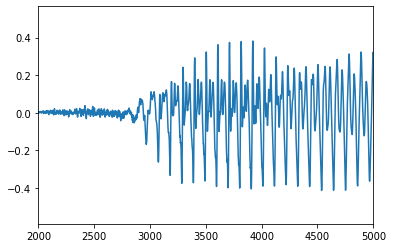

In [9]:
plt.plot(samples)
plt.xlim([2000,5000])

x-axis has been converted to time using sample rate. 
matplotlib plt.plot(y), would output the same figure, but with sample number on the x-axis instead of seconds

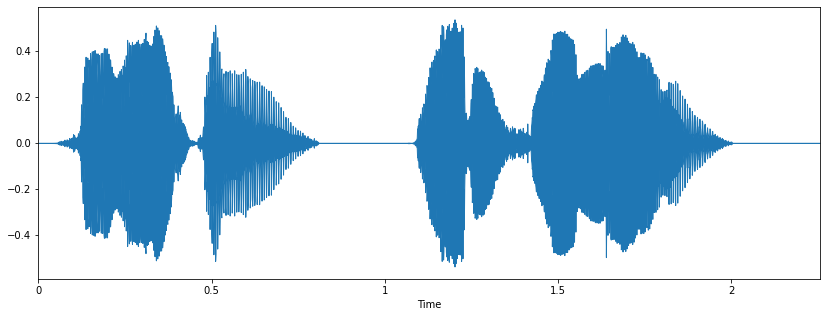

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

The wave form is 2 dimensions but the audio signals are 3 dimension and there is an another important dimension -  frequency.

## Spectogram

The spectrogram is a visual representation of a spectrum of different frequencies for time.

Spectrograms are generated from sound signals using Fourier Transforms. A Fourier Transform decomposes the signal into its constituent frequencies and displays the amplitude of each frequency present in the signal.

It plots Frequency (y-axis) vs Time (x-axis) and uses different colors to indicate the Amplitude of each frequency. The brighter the color the higher the energy of the signal.

We use ``librosa.stft()`` -  Short-time Fourier transform (STFT).

The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.

/usr/local/lib/python3.7/dist-packages/librosa/display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


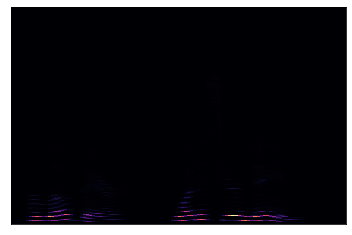

In [11]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

Notice: Most of what we are able to hear are concentrated in a narrow range of frequencies and amplitudes.

## Mel Spectrogram

A Mel Spectrogram makes two important changes relative to a regular Spectrogram that plots Frequency vs Time.

- Mel Scale instead of Frequency on the y-axis
- Decibel Scale instead of Amplitude to indicate colors

Mel Frequency Cepstral Coefficients (MFCC)

(5, 106)


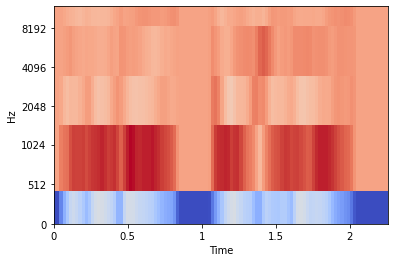

In [12]:
mfccs = librosa.feature.mfcc(samples,sr=sample_rate, n_mfcc = 5)
print(mfccs.shape)
librosa.display.specshow(mfccs,sr=sample_rate, x_axis='time', y_axis='mel')

In [13]:
mfccs

array([[-5.80830139e+02, -5.80091858e+02, -4.73918335e+02,
        -3.77936737e+02, -3.09179932e+02, -2.43126953e+02,
        -2.25691223e+02, -2.43646622e+02, -2.71397736e+02,
        -3.07223785e+02, -3.47624420e+02, -3.13586517e+02,
        -2.46547379e+02, -2.08778778e+02, -1.97688873e+02,
        -2.02965195e+02, -2.18508652e+02, -2.37467789e+02,
        -2.55916153e+02, -2.87400360e+02, -3.68422272e+02,
        -3.70479309e+02, -2.50783249e+02, -2.04665344e+02,
        -2.08039963e+02, -2.13528549e+02, -2.29772125e+02,
        -2.45521591e+02, -2.52371002e+02, -2.61582672e+02,
        -2.75418182e+02, -2.82233917e+02, -3.12803558e+02,
        -3.39032501e+02, -3.65357025e+02, -3.85806671e+02,
        -3.92739258e+02, -4.03849518e+02, -4.41243439e+02,
        -5.37349243e+02, -5.80830139e+02, -5.80830139e+02,
        -5.80830139e+02, -5.80830139e+02, -5.80830139e+02,
        -5.80830139e+02, -5.80830139e+02, -5.80830139e+02,
        -5.80830139e+02, -5.75273499e+02, -5.01581604e+0

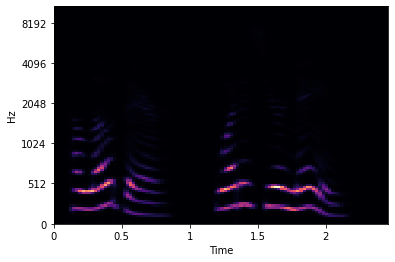

In [14]:
# use the mel-scale instead of raw frequency
sgram_mag, comp = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram, x_axis='time', y_axis='mel')


In [15]:
comp.shape
comp

array([[-1.        -8.7422777e-08j,  1.        +0.0000000e+00j,
         1.        +0.0000000e+00j, ..., -1.        -8.7422777e-08j,
        -1.        -8.7422777e-08j, -1.        -8.7422777e-08j],
       [-1.        +8.7422777e-08j,  0.9903542 +1.3855907e-01j,
        -0.48075584+8.7685448e-01j, ..., -0.2417125 -9.7034788e-01j,
        -0.11366761-9.9351883e-01j,  0.57639307-8.1717259e-01j],
       [-1.        +8.7422777e-08j,  0.6952471 +7.1877080e-01j,
        -0.6892583 -7.2451568e-01j, ...,  0.8999799 -4.3593144e-01j,
         0.05034911-9.9873167e-01j,  0.45118618+8.9242983e-01j],
       ...,
       [-1.        -8.7422777e-08j, -0.7336376 +6.7954093e-01j,
         0.9158685 -4.0147838e-01j, ..., -0.3028956 -9.5302373e-01j,
         0.51984566+8.5426021e-01j, -0.59603596+8.0295771e-01j],
       [ 1.        +7.8573010e-16j, -0.24590713-9.6929342e-01j,
        -0.73193395+6.8137556e-01j, ...,  0.7220808 -6.9180870e-01j,
        -0.36299902-9.3178952e-01j, -0.6786314 -7.3447901e-01j]

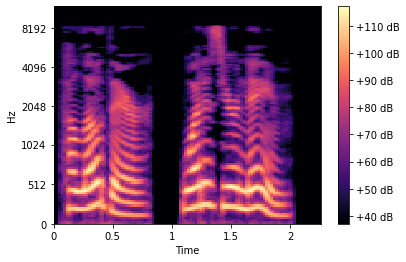

In [16]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

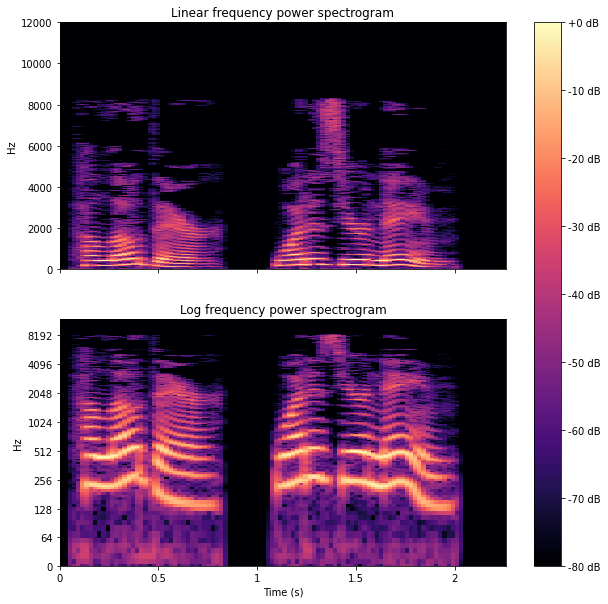

In [17]:
d = librosa.stft(samples)
D = librosa.amplitude_to_db(np.abs(d),ref=np.max)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(10,10))
img = librosa.display.specshow(D, y_axis='linear', x_axis='s',sr=sample_rate,ax=ax[0])
ax[0].set(title='Linear frequency power spectrogram')
ax[0].label_outer()
librosa.display.specshow(D,y_axis='log',x_axis='s',sr=sample_rate,ax=ax[1])
ax[1].set(title='Log frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format='%+2.f dB')